### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


/Users/krishnakuncham/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


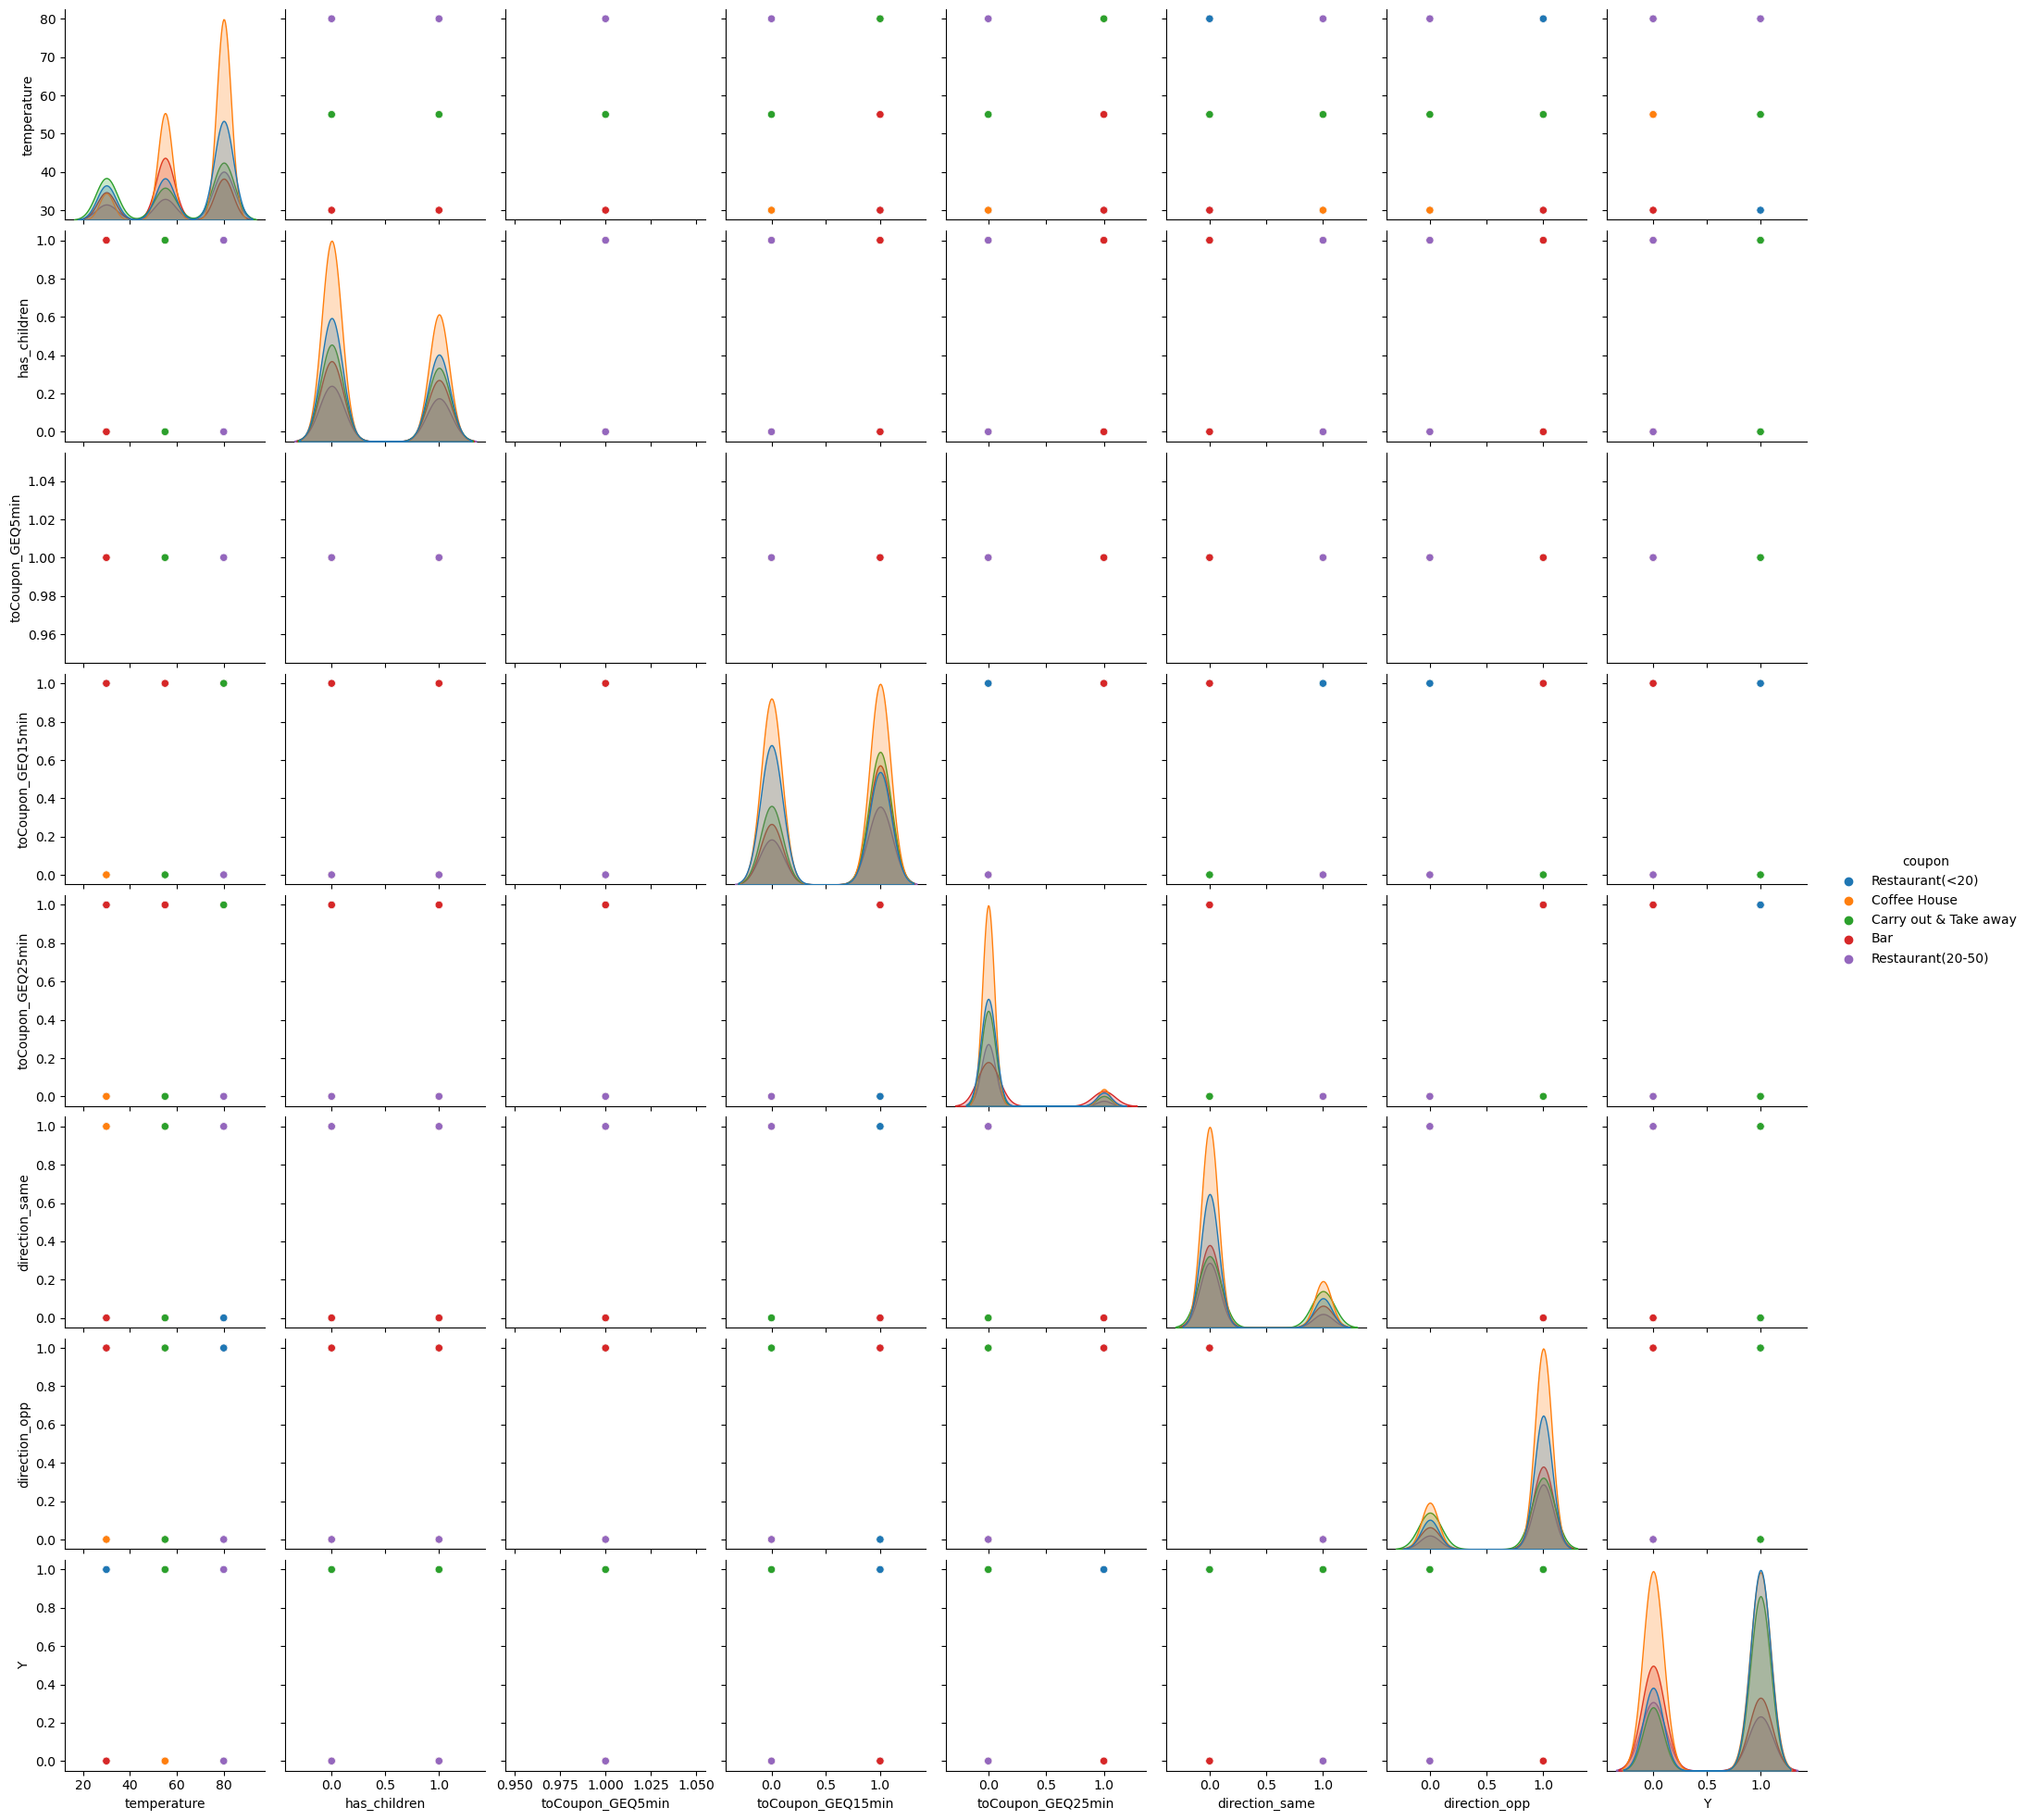

In [83]:
sns.pairplot(data, hue="coupon")

###Description of the below columns is not avaialble.


toCoupon_GEQ5min,
toCoupon_GEQ15min,
toCoupon_GEQ25min



In [6]:
data['toCoupon_GEQ5min'].unique()

array([1])

2. Investigate the dataset for missing or problematic data.

In [7]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

### Below columns can be dropped from the analysis as there is not much information or data description available.


    car
    toCoupon_GEQ5min
    toCoupon_GEQ15min
    toCoupon_GEQ25mi columns

In [9]:
#data = data.drop(['car','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min'], axis=1)

## Duplicates in the Data

In [10]:
data[data.duplicated()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


In [11]:
pd.set_option('display.max_columns', None)
data[(data['destination']=='Home') & (data['passanger']=='Alone') & (data['weather']=='Sunny') & \
     (data['temperature']==80) & (data['coupon']=='Bar') & (data['expiration']=='2h') & \
    (data['gender']=='Male') & (data['age']=='46') ]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
7189,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Single,0,Graduate degree (Masters or Doctorate),Computer & Mathematical,$37500 - $49999,NaN,never,gt8,1~3,4~8,less1,1,0,0,1,0,0
7409,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,0,0,1,0,1
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,0,0,1,0,1


In [12]:
print('Before Duplicates',data.shape)
#duplicate_data = data[data.duplicated()]
#new_data = data.drop(duplicate_data.index)
data = data.drop_duplicates()
print('After Duplicates',data.shape)

Before Duplicates (12684, 26)
After Duplicates (12610, 26)


In [13]:
data = data.drop(['car'], axis=1) ## Removed the car column.
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               150
RestaurantLessThan20    129
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

### Handling Missig Values

Handle the missing values by imputation, this data consists of both Numerical and categorical values. We are filling the missing data by most frequent values utilizing the Imputaion by Mode. Before imputing let's find out the categorical columns.

In [14]:
data.columns[data.dtypes == 'object']

Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
       'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')

### 
#### Most frequent values of the missing value columns

In [15]:
print(data['Bar'].value_counts())
print(data['CoffeeHouse'].value_counts())
print(data['CarryAway'].value_counts())
print(data['RestaurantLessThan20'].value_counts())
print(data['Restaurant20To50'].value_counts())

Bar
never    5178
less1    3438
1~3      2468
4~8      1071
gt8       348
Name: count, dtype: int64
CoffeeHouse
less1    3362
1~3      3199
never    2946
4~8      1779
gt8      1107
Name: count, dtype: int64
CarryAway
1~3      4645
4~8      4242
less1    1849
gt8      1572
never     152
Name: count, dtype: int64
RestaurantLessThan20
1~3      5356
4~8      3553
less1    2071
gt8      1282
never     219
Name: count, dtype: int64
Restaurant20To50
less1    6041
1~3      3266
never    2122
4~8       728
gt8       264
Name: count, dtype: int64


In [16]:
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])

print(data.isnull().sum())
print(data.shape)

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64
(12610, 25)


There are no more missing values in the dataset. 
Let's convert all the categorical values to the Numerical values. With numerical values it is easy to identify the corelation between the features. 

4. What proportion of the total observations chose to accept the coupon? 

[7157, 5453]


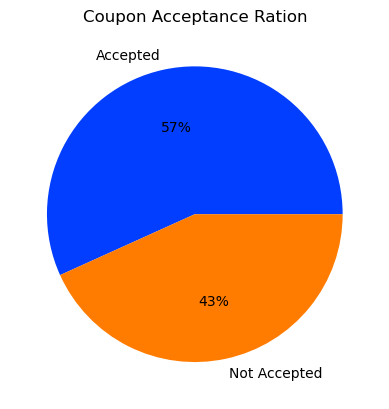

In [74]:
data_coupon = [data[data['Y']==1].shape[0],data[data['Y']!=1].shape[0]]
print(data_coupon)
keys = ['Accepted', 'Not Accepted']
palette_color = sns.color_palette('bright')
plt.pie(data_coupon, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title("Coupon Acceptance Ration")
plt.show()

5. Use a bar plot to visualize the `coupon` column.

<Axes: title={'center': 'Coupon Counts'}, xlabel='Coupons', ylabel='Count'>

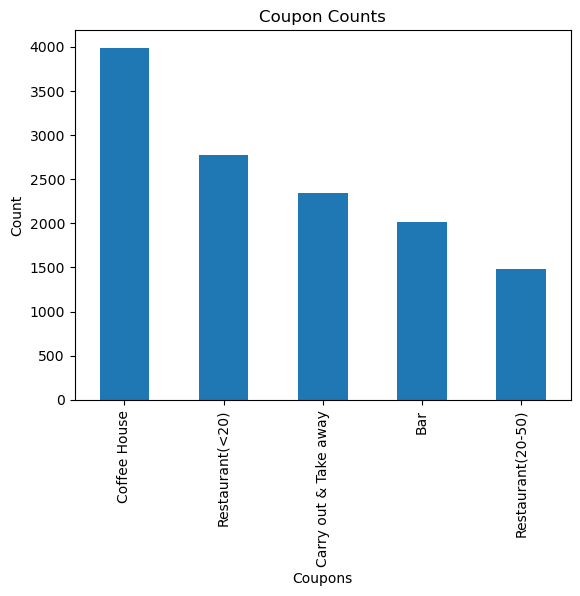

In [18]:
df_coupon_bar = data['coupon']
df_coupon_bar.value_counts().plot(kind='bar', title='Coupon Counts', xlabel='Coupons', ylabel='Count')

6. Use a histogram to visualize the temperature column.

/Users/krishnakuncham/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


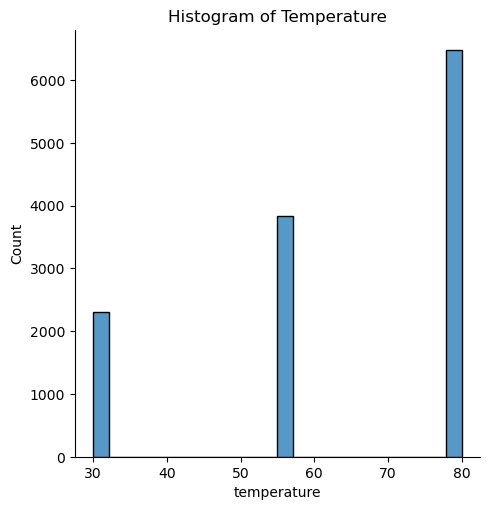

In [78]:
sns.displot(data=data, x='temperature').set(title = 'Histogram of Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
data_coupon_bar = data[data['coupon']=='Bar']
data_coupon_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


[824, 1186]


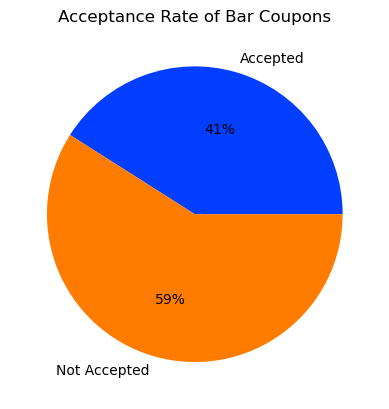

In [79]:
data_bar = [data_coupon_bar[data_coupon_bar['Y']==1].shape[0],data_coupon_bar[data_coupon_bar['Y']!=1].shape[0]]
print(data_bar)
keys = ['Accepted', 'Not Accepted']
palette_color = sns.color_palette('bright')
plt.pie(data_bar, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title("Acceptance Rate of Bar Coupons")
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [22]:
data_coupon_bar['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

/var/folders/6p/pk_vb21d3sz8bqltllmnd3700000gn/T/ipykernel_91481/669545902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coupon_bar['Bar_times'] = data_coupon_bar['Bar'].apply(lambda x: 'less than 3' if x in ['never', 'less1', '1~3'] else 'More than 3')


[Text(0.5, 1.0, 'Acceptance between 3 or fewer times a month and rest')]

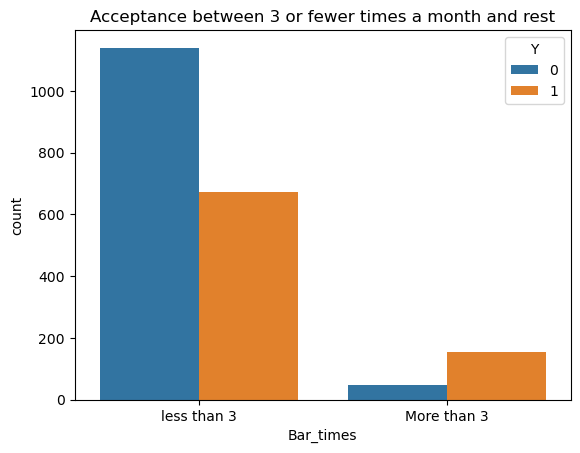

In [80]:
data_coupon_bar['Bar_times'] = data_coupon_bar['Bar'].apply(lambda x: 'less than 3' if x in ['never', 'less1', '1~3'] else 'More than 3')
sns.countplot(data_coupon_bar, x="Bar_times", hue="Y").set(title="Acceptance between 3 or fewer times a month and rest")

In [24]:
data_coupon_bar['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [25]:
data_coupon_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Bar_times
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0,less than 3
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1,0,1,less than 3
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,1,0,1,0,less than 3
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1,less than 3
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1,less than 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0,less than 3
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0,less than 3
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0,less than 3
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0,less than 3


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


/var/folders/6p/pk_vb21d3sz8bqltllmnd3700000gn/T/ipykernel_91481/2296649516.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coupon_bar['25_and_more_than_once'] = data_coupon_bar.apply(lambda row : select_data(row), axis=1)


[Text(0.5, 1.0, 'Acceptance rate between drivers go to a bar more than once a month and are over the age of 25 to the all others')]

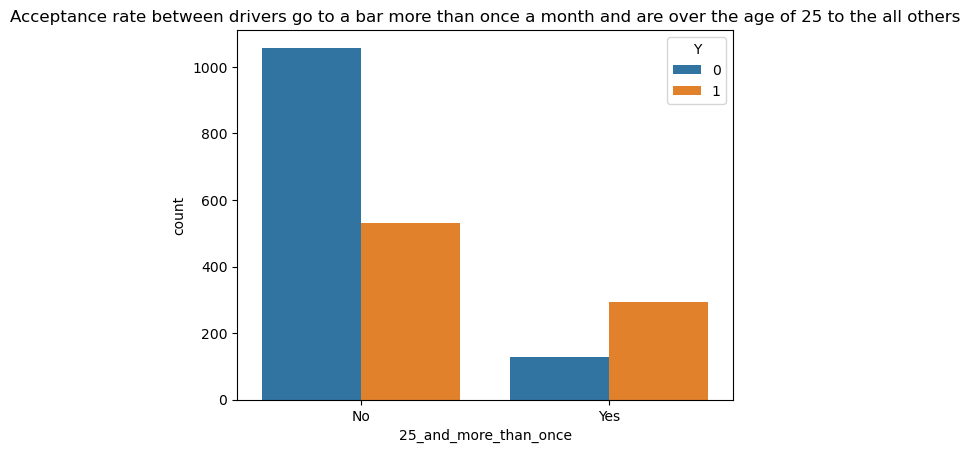

In [81]:
def select_data(row):
    if (row['Bar'] in(['1~3', 'gt8', '4~8']) and (row['age'] in(['46', '26', '31', '41', '50plus', '36']))):
        return 'Yes'
    else:
        return 'No'
    
data_coupon_bar['25_and_more_than_once'] = data_coupon_bar.apply(lambda row : select_data(row), axis=1)

sns.countplot(data_coupon_bar, x="25_and_more_than_once", hue="Y").set(title="Acceptance rate between drivers go to a bar more than once a month and are over the age of 25 to the all others")



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [27]:
print(data_coupon_bar.passanger.unique())
print(data_coupon_bar.occupation.unique())

['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


In [28]:
data_coupon_bar[['Bar','passanger','occupation','Y']]

,Bar,passanger,occupation,Y
9,never,Kid(s),Unemployed,0
13,never,Alone,Unemployed,1
17,never,Alone,Unemployed,0
24,never,Friend(s),Architecture & Engineering,1
35,never,Alone,Architecture & Engineering,1
...,...,...,...,...
12663,never,Friend(s),Sales & Related,0
12664,never,Friend(s),Sales & Related,0
12667,never,Alone,Sales & Related,0
12670,never,Partner,Sales & Related,0


/var/folders/6p/pk_vb21d3sz8bqltllmnd3700000gn/T/ipykernel_91481/1112418834.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['drivers']= df5.apply(lambda row : select_df5(row), axis=1 )


           Y  count
drivers            
No       431   1459
Yes      393    551


/Users/krishnakuncham/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


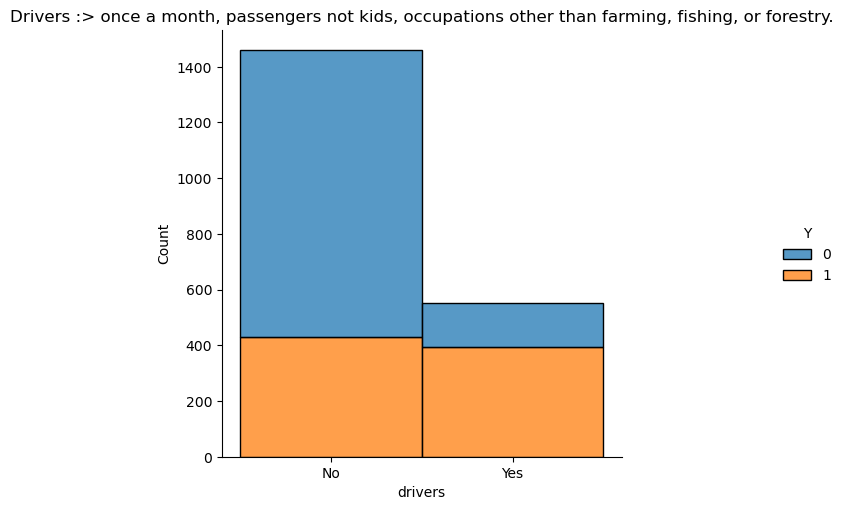

In [29]:
df5 = data_coupon_bar[['Bar','passanger','occupation','Y']]

def select_df5(row):
    if ((row['Bar'] in(['1~3', 'gt8', '4~8'])) and (row['passanger'] !='Kid(s)') and \
        (row['occupation'] not in(['farming', 'fishing','forestry']))):
        return 'Yes'
    else:
        return 'No'

df5['drivers']= df5.apply(lambda row : select_df5(row), axis=1 )
df5_total_data = df5.groupby('drivers').agg({'Y': 'sum','drivers':'size'})
df5_total_data.rename(columns={'drivers':'count'},inplace=True)
df5_total_data.reset_index()

print(df5_total_data)
sns.displot(data=df5, x='drivers',  hue = 'Y', multiple='stack').set(title = 'Drivers :> once a month, passengers not kids, occupations other than farming, fishing, or forestry.')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [30]:
print(data_coupon_bar.Bar.unique())
print(data_coupon_bar.passanger.unique())
print(data_coupon_bar.maritalStatus.unique())
print(data_coupon_bar.age.unique())
print(data_coupon_bar.RestaurantLessThan20.unique())
print(data_coupon_bar.income.unique())

['never' 'less1' '1~3' 'gt8' '4~8']
['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
['4~8' '1~3' 'less1' 'gt8' 'never']
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


           Y  count
drivers            
No       367   1234
Yes      457    776


/var/folders/6p/pk_vb21d3sz8bqltllmnd3700000gn/T/ipykernel_91481/2528417113.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['drivers']= df6.apply(lambda row : select_df6(row), axis=1 )
/Users/krishnakuncham/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


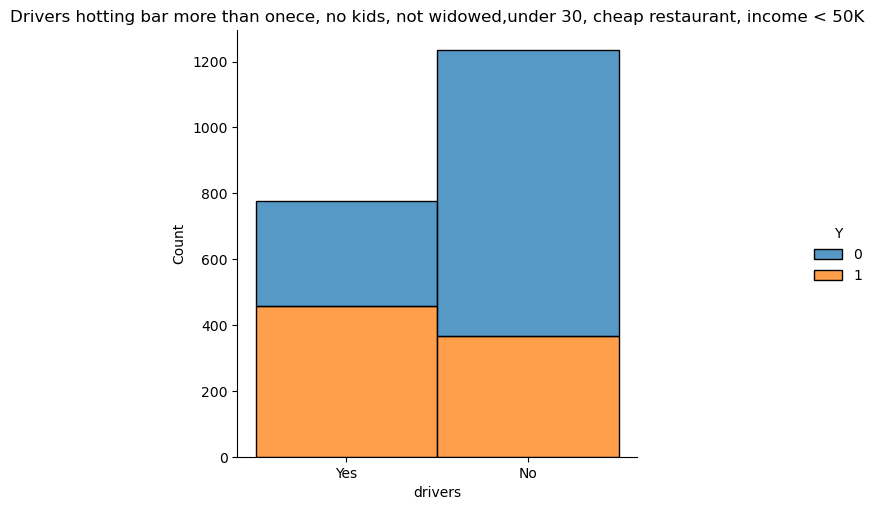

In [33]:
df6 = data_coupon_bar[['Bar','passanger','maritalStatus','age','RestaurantLessThan20','income','Y']]

def select_df6(row):
    if (((row['Bar'] in(['1~3', 'gt8', '4~8'])) and (row['passanger'] !='Kid(s)') and (row['maritalStatus'] !='Widowed')) or \
        ((row['Bar'] in(['1~3', 'gt8', '4~8'])) and (row['age'] in ['21' , '26', 'below21']) ) or \
        ((row['RestaurantLessThan20'] in(['gt8', '4~8'])) and (row['income'] in ['$12500 - $24999','$37500 - $49999','$25000 - $37499','Less than $12500'])     )
       ):
        return 'Yes'
    else:
        return 'No'
    
df6['drivers']= df6.apply(lambda row : select_df6(row), axis=1 )
df6_total_data = df6.groupby('drivers').agg({'Y': 'sum','drivers':'size'})
df6_total_data.rename(columns={'drivers':'count'},inplace=True)
df6_total_data.reset_index()

print(df6_total_data)
sns.displot(data=df6, x='drivers',  hue = 'Y', multiple='stack').set(title = 'Drivers hotting bar more than onece, no kids, not widowed,under 30, cheap restaurant, income < 50K')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Drivers who are more than 25 in age and frequent the bars more than once a month accept the coupons than the rest of tge drivers.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [65]:
data_other_coupon_1 = data[data['Y']==1]
print(data_other_coupon_1[data_other_coupon_1['coupon']=='Coffee House'].shape)
print(data_other_coupon_1.shape)
cf = (data_other_coupon_1[data_other_coupon_1['coupon']=='Coffee House'].shape[0])/(data_other_coupon_1.shape[0])*100
cf

(1989, 25)
(7157, 25)


27.790973871733964

# Out of all the coupon acceptances "Coffe House" has 27% acceptance rate.

In [68]:
data_coffee = data_other_coupon_1[data_other_coupon_1['coupon']=='Coffee House']
cat_cols = data_coffee.columns[data_coffee.dtypes == 'object']
cat_dict = {}
for col in cat_cols:
    col_val_uni = data_coffee[col].unique()
    assign_vals = {value: index for index, value in enumerate(col_val_uni)}
    cat_dict[col] = assign_vals
data_coffee = data_coffee.replace(cat_dict)
data_coffee

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12,0,0,0,55,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1
16,1,1,0,55,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1
21,1,1,0,55,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1
45,0,2,0,80,2,0,0,1,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1
48,0,2,0,80,3,0,1,1,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12579,2,1,1,55,4,0,0,1,0,1,0,0,1,1,0,0,0,1,2,1,0,0,1,0,1
12601,2,1,1,55,4,0,0,0,5,3,1,0,9,1,0,3,0,1,2,1,0,0,1,0,1
12608,1,1,2,30,1,0,1,0,5,3,1,0,9,1,0,3,0,1,2,1,0,0,1,0,1
12624,2,1,1,55,4,0,0,0,0,0,0,1,0,0,0,1,0,1,2,1,0,0,1,0,1


In [70]:
data_coffee.corr()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
destination,1.000000,-0.368441,0.302484,-0.175567,-0.526292,NaN,0.053085,0.029275,0.034881,0.006221,-0.003081,-0.007121,-0.025110,-0.009325,0.013133,-0.014175,-0.040714,-0.003880,0.035990,NaN,-0.124348,0.209931,0.550927,-0.550927,NaN
passanger,-0.368441,1.000000,-0.133578,0.272275,0.329870,NaN,-0.064625,-0.002577,-0.046401,-0.126763,-0.244567,-0.037928,0.013628,-0.010412,0.042129,0.017940,-0.005686,-0.015919,-0.047381,NaN,-0.074765,-0.162052,-0.231594,0.231594,NaN
weather,0.302484,-0.133578,1.000000,-0.720660,-0.018930,NaN,0.183527,0.015765,0.051471,0.027252,0.005709,-0.016088,0.019583,-0.006605,-0.051616,0.012373,0.037677,0.009524,0.075946,NaN,0.033134,-0.085141,0.266016,-0.266016,NaN
temperature,-0.175567,0.272275,-0.720660,1.000000,0.015586,NaN,-0.122021,-0.026527,-0.003195,-0.023096,-0.023692,0.013540,0.002034,0.030469,0.024498,0.009347,-0.019055,-0.019205,-0.065192,NaN,-0.063194,-0.134729,-0.052441,0.052441,NaN
time,-0.526292,0.329870,-0.018930,0.015586,1.000000,NaN,0.004018,-0.015183,-0.025927,-0.002517,-0.010106,-0.034491,0.041160,0.019474,-0.032577,0.008616,0.027397,0.021156,-0.010675,NaN,0.194022,-0.177552,-0.276363,0.276363,NaN
coupon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expiration,0.053085,-0.064625,0.183527,-0.122021,0.004018,NaN,1.000000,0.010989,0.035624,0.025407,0.019287,0.044217,-0.006172,0.000191,-0.026522,-0.020010,0.059105,0.003778,0.035955,NaN,-0.014743,-0.184182,0.112802,-0.112802,NaN
gender,0.029275,-0.002577,0.015765,-0.026527,-0.015183,NaN,0.010989,1.000000,0.019988,-0.023461,-0.147707,-0.062167,0.062582,-0.012866,0.135991,-0.004277,0.002328,0.041643,0.023909,NaN,-0.007249,0.000769,0.010051,-0.010051,NaN
age,0.034881,-0.046401,0.051471,-0.003195,-0.025927,NaN,0.035624,0.019988,1.000000,0.202936,0.243191,0.077089,0.126246,0.059365,-0.185058,0.040456,0.070441,-0.002991,0.058991,NaN,0.021769,-0.018488,0.037529,-0.037529,NaN
maritalStatus,0.006221,-0.126763,0.027252,-0.023096,-0.002517,NaN,0.025407,-0.023461,0.202936,1.000000,0.483458,0.109853,0.090521,0.081559,-0.115327,0.044775,0.006618,-0.006053,0.044423,NaN,0.025684,0.022478,-0.000544,0.000544,NaN


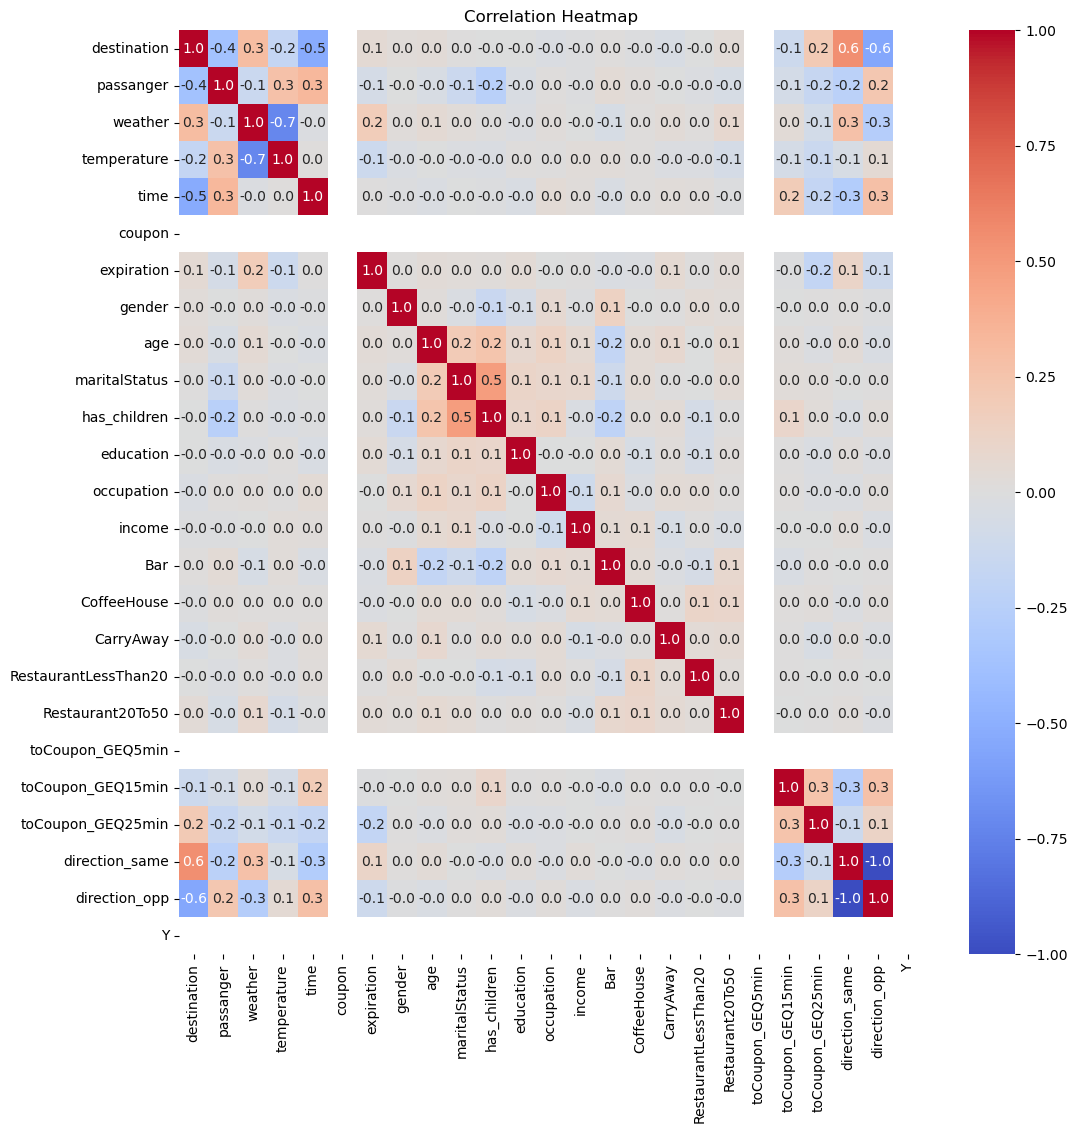

In [73]:
plt.figure(figsize=(12, 12))
sns.heatmap(data_coffee.corr(), annot=True, cmap='coolwarm', fmt='.1f'  )
plt.title('Correlation Heatmap')
plt.show()